<a href="https://colab.research.google.com/github/Lucas-Siade/Data-Science/blob/main/DS%20-%20DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exemplo**

## **Bibliotecas**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

## **Dataset**

In [4]:
datasetDBSCAN = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Science/Dataset - Iris.csv")

#DEFINIÇÃO DAS COLUNAS
datasetDBSCAN.drop(['Id'], axis=1, inplace=True)

datasetDBSCAN.rename(columns={
    'SepalLengthCm': 'Comprimento da Sépala',
    'SepalWidthCm': 'Largura da Sépala',
    'PetalLengthCm': 'Comprimento da Pétala',
    'PetalWidthCm': 'Largura da Pétala',
    'Species': 'Espécie',
}, inplace=True)

display(datasetDBSCAN.head())

,Comprimento da Sépala,Largura da Sépala,Comprimento da Pétala,Largura da Pétala,Espécie
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


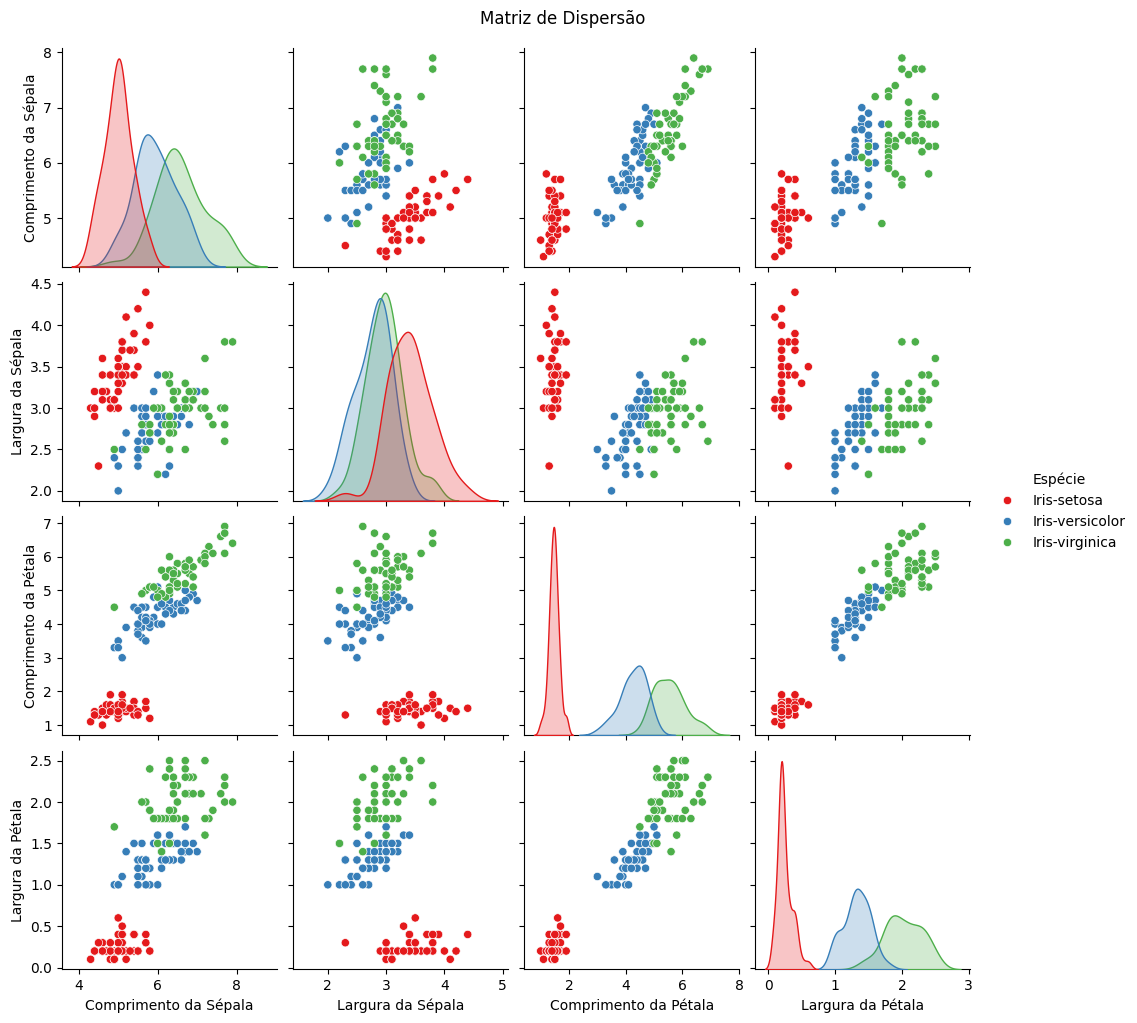

In [5]:
sns.pairplot(datasetDBSCAN, hue='Espécie', palette='Set1')
plt.suptitle('Matriz de Dispersão', y=1.02)
plt.show()

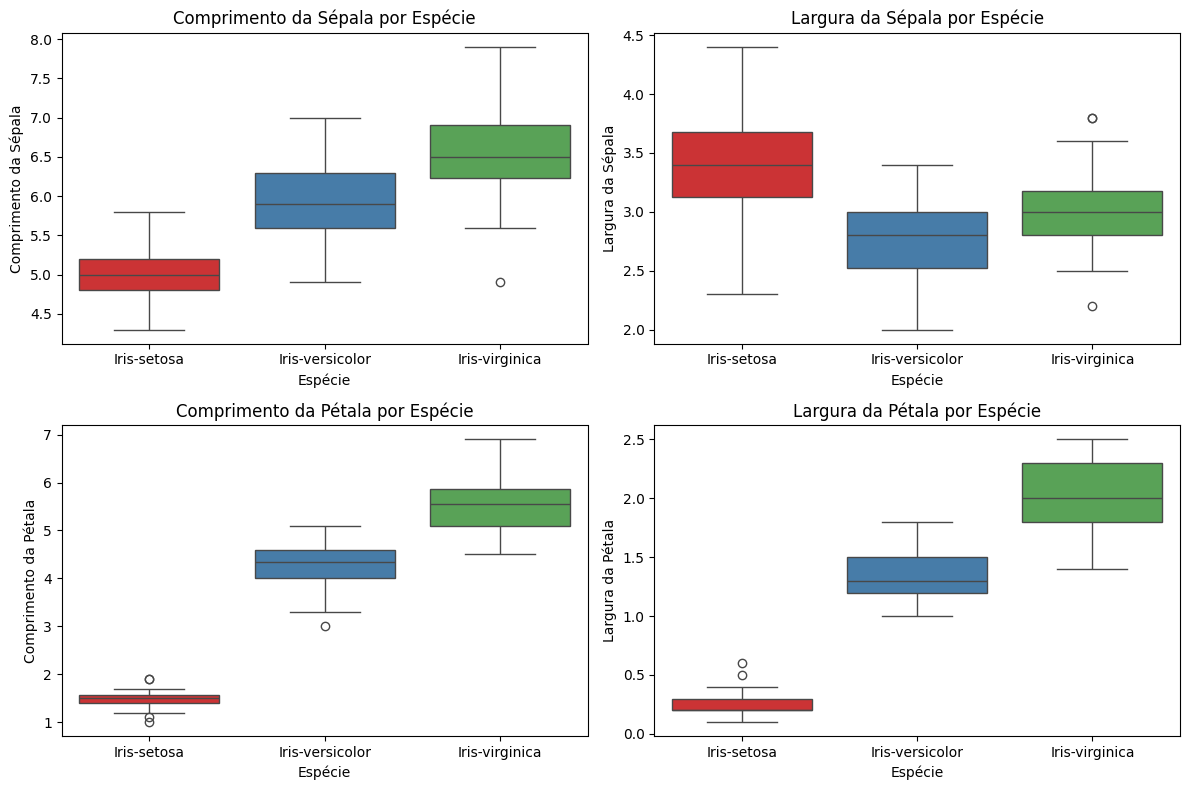

In [6]:
plt.figure(figsize=(12, 8))

for i, coluna in enumerate(datasetDBSCAN.columns[:-1]):
    plt.subplot(2, 2, i+1)
    sns.boxplot(data=datasetDBSCAN, x='Espécie', y=coluna, hue='Espécie', palette='Set1', legend=False)
    plt.title(f'{coluna} por Espécie')

plt.tight_layout()
plt.show()

## **Modelo**

In [7]:
#DEFINIR VARIÁVEIS
XDBSCAN = datasetDBSCAN.drop(["Espécie"], axis=1)

scaler = StandardScaler()
XDBSCAN = scaler.fit_transform(XDBSCAN)
XDBSCAN = pd.DataFrame(XDBSCAN, columns=datasetDBSCAN.drop(["Espécie"], axis=1).columns)

#TREINO DO MODELO
modelDBSCAN = DBSCAN(eps=0.8, min_samples=5)
YDBSCAN = modelDBSCAN.fit_predict(XDBSCAN)

In [8]:
clusters = len(set(YDBSCAN)) - (1 if -1 in YDBSCAN else 0)
ruidos = list(YDBSCAN).count(-1)
species = datasetDBSCAN["Espécie"].values

print(f"Quantidade de Clusters encontrados: {clusters}")
print(f"Quantidade de Ruídos: {ruidos}")

#MEDE SE CADA CLUSTER CONTÉM APENAS DADOS DE UMA MESMA CLASSE
print(f"Homogeneidade: {metrics.homogeneity_score(species, YDBSCAN):.3f}")

#MEDE SE TODOS OS DADOS DA MESMA CLASSE ESTÃO NO MESMO CLUSTER
print(f"Completeness: {metrics.completeness_score(species, YDBSCAN):.3f}")

#SIMILARIDADE ENTRE O AGRUPAMENTO PRODUZIDO E O AGRUPAMENTO REAL
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(species, YDBSCAN):.3f}")

#SIMILARIDADE ENTRE O AGRUPAMENTO PRODUZIDO E O AGRUPAMENTO REAL, LEVANDO EM CONTA O ACASO
print(f"Adjusted Mutual Information: {metrics.adjusted_mutual_info_score(species, YDBSCAN):.3f}")

#O QUÃO BEM SEPARADO ESTÃO OS CLUSTER
print(f"Silhouette Coefficient (Coeficiente de Silhueta): {metrics.silhouette_score(XDBSCAN, YDBSCAN):.3f}")

Quantidade de Clusters encontrados: 2
Quantidade de Ruídos: 4
Homogeneidade: 0.579
Completeness: 0.854
Adjusted Rand Index: 0.552
Adjusted Mutual Information: 0.685
Silhouette Coefficient (Coeficiente de Silhueta): 0.521


## **Extra**

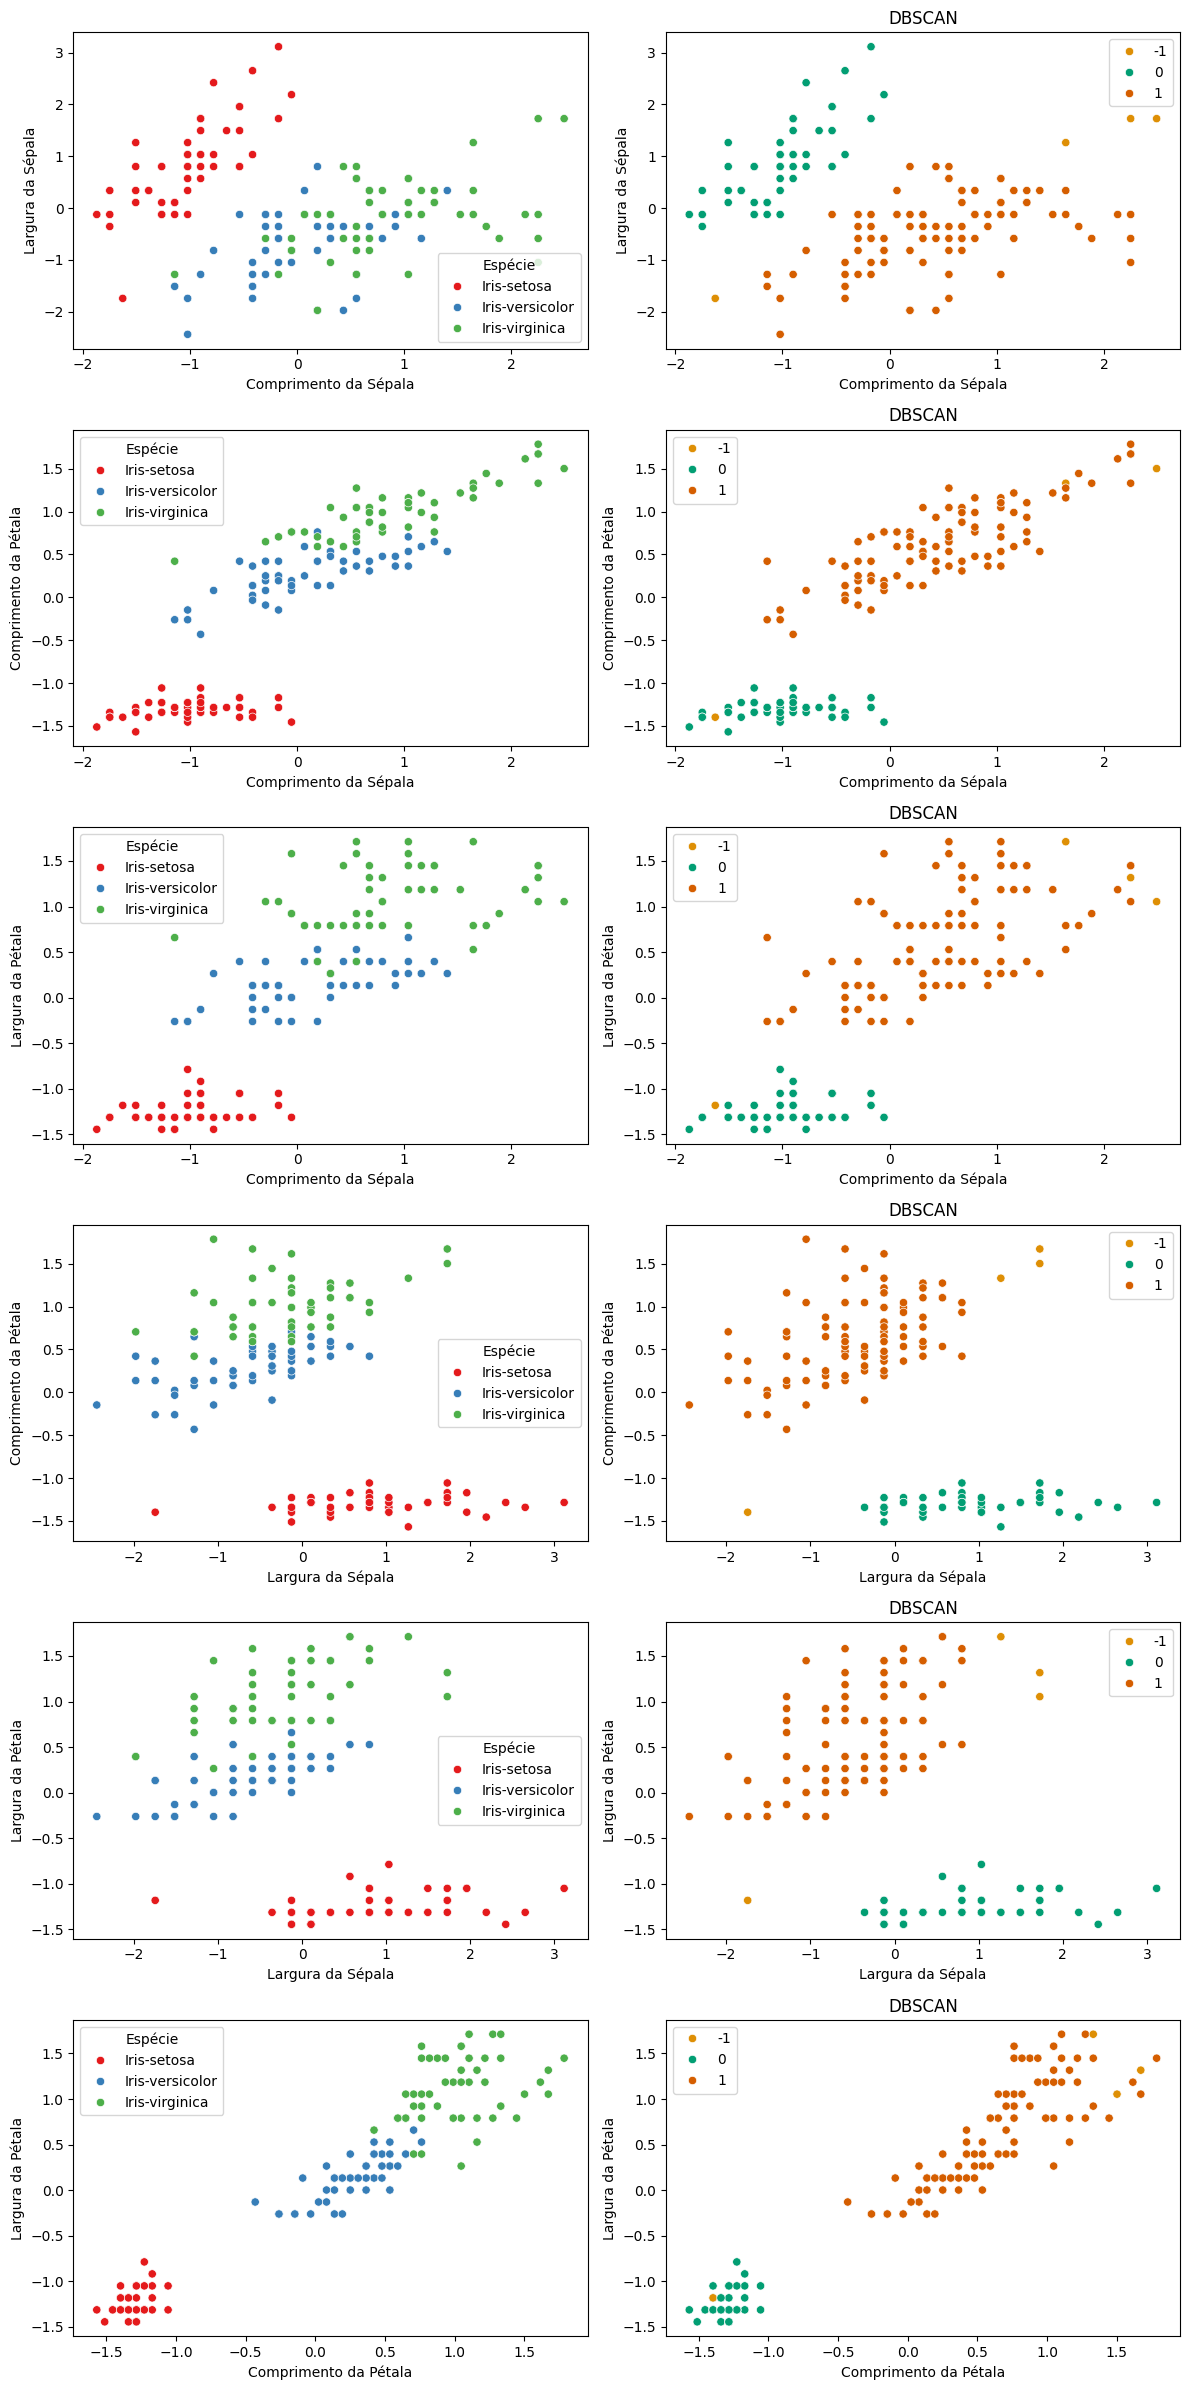

In [9]:
import itertools
from itertools import combinations

features = XDBSCAN.columns

#GERA AS COMBINAÇÕES COM 2 FEATURES
combinations = list(combinations(features, 2))

plt.figure(figsize=(12, len(combinations) * 4))

for index, (x_feature, y_feature) in enumerate(combinations, 1):
    #GRÁFICO REAL
    plt.subplot(len(combinations), 2, 2 * index - 1)
    sns.scatterplot(
        x=XDBSCAN[x_feature],
        y=XDBSCAN[y_feature],
        hue=datasetDBSCAN["Espécie"],
        palette="Set1"
    )
    plt.xlabel(x_feature)
    plt.ylabel(y_feature)

    #GRÁFICO COM DBSCAN
    plt.subplot(len(combinations), 2, 2 * index)
    sns.scatterplot(
        x=XDBSCAN[x_feature],
        y=XDBSCAN[y_feature],
        hue=YDBSCAN,
        palette=sns.color_palette("colorblind")[1:4],
    )
    plt.xlabel(x_feature)
    plt.ylabel(y_feature)
    plt.title('DBSCAN')

plt.tight_layout()
plt.show()

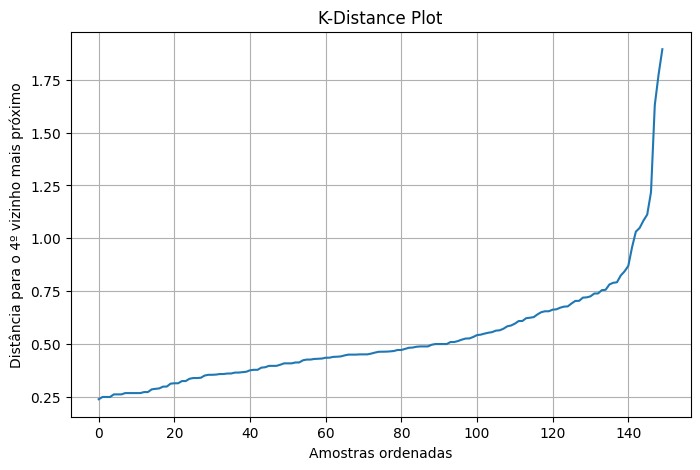

In [10]:
from sklearn.neighbors import NearestNeighbors

#K-DISTANCE PLOT
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(XDBSCAN)
distances, indices = neighbors_fit.kneighbors(XDBSCAN)

distances = np.sort(distances[:, 4])

plt.figure(figsize=(8,5))
plt.plot(distances)
plt.ylabel('Distância para o 4º vizinho mais próximo')
plt.xlabel('Amostras ordenadas')
plt.title('K-Distance Plot')
plt.grid(True)
plt.show()

,Produtos Frescos,Leite,Itens de Despensa,Congelados,Limpeza,Especiarias
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
3,13265,1196,4221,6404,507,1788
5,9413,8259,5126,666,1795,1451
6,12126,3199,6975,480,3140,545


,count
Cluster,
-1,115
0,188
1,7
2,17
3,5



Número de clusters: 4
Número de ruídos: 115
Silhouette Coefficient: 0.061


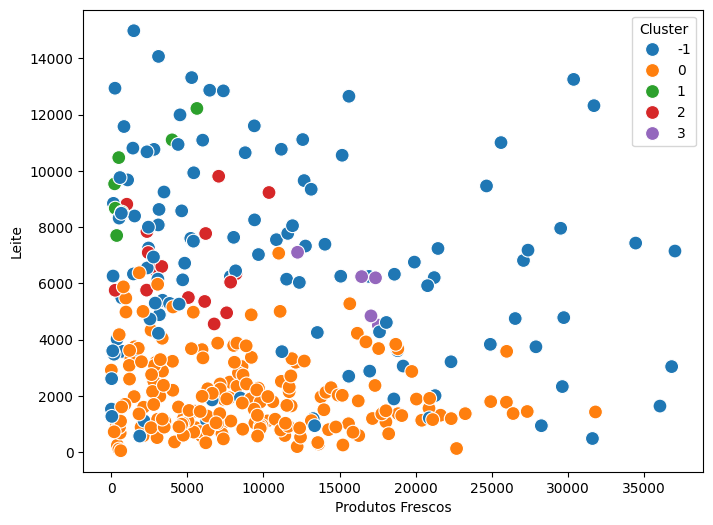

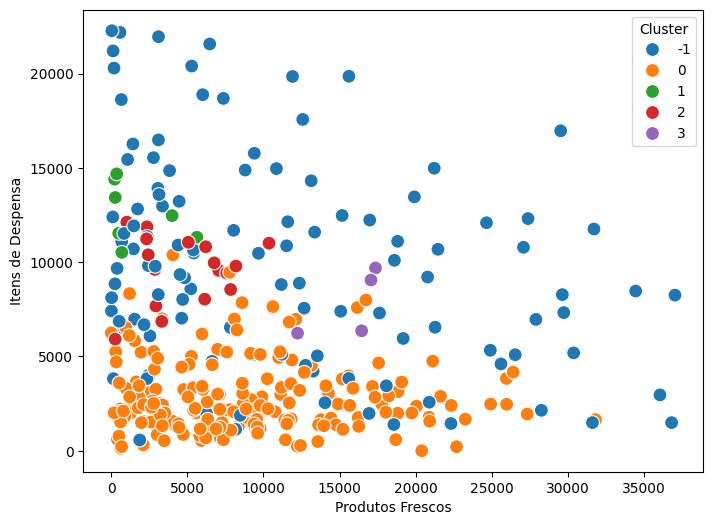

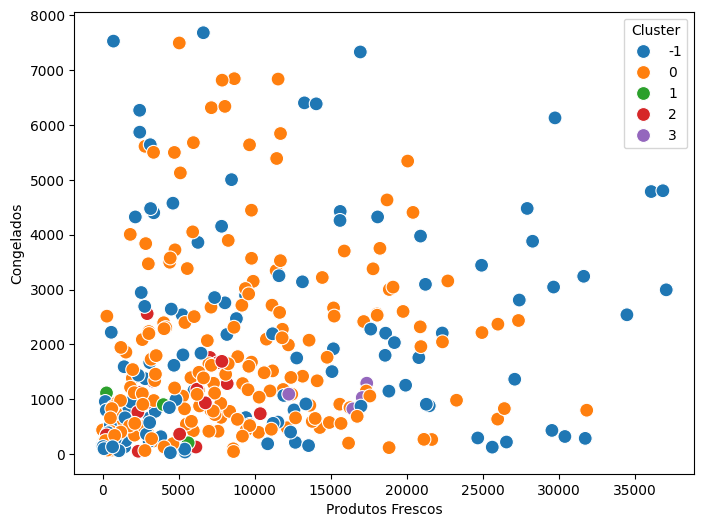

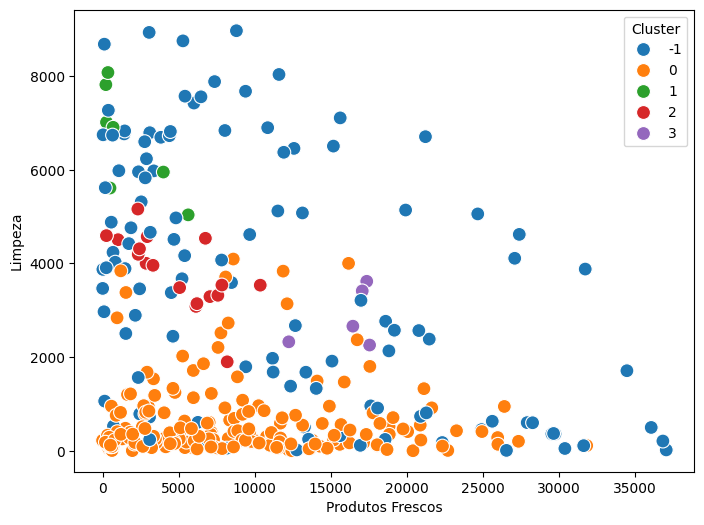

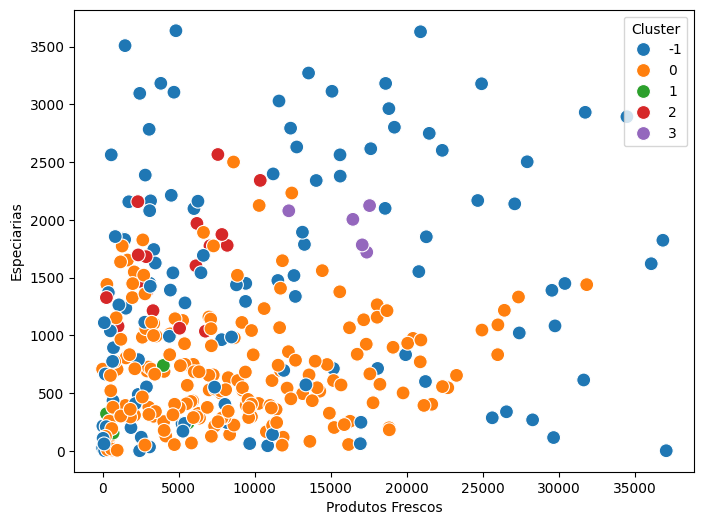

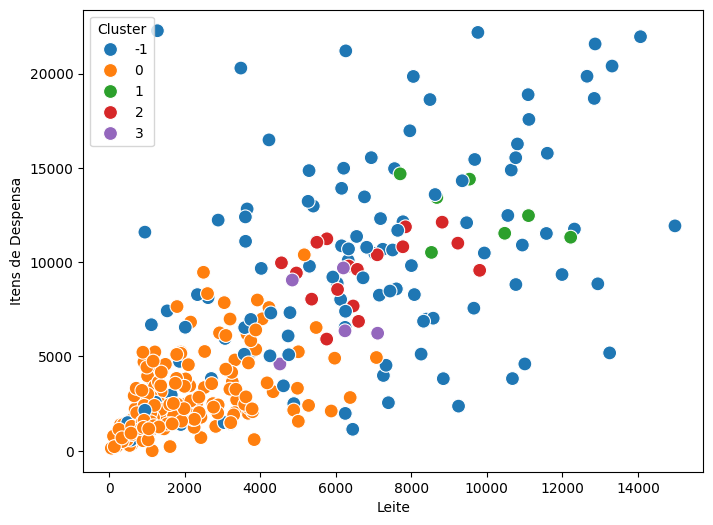

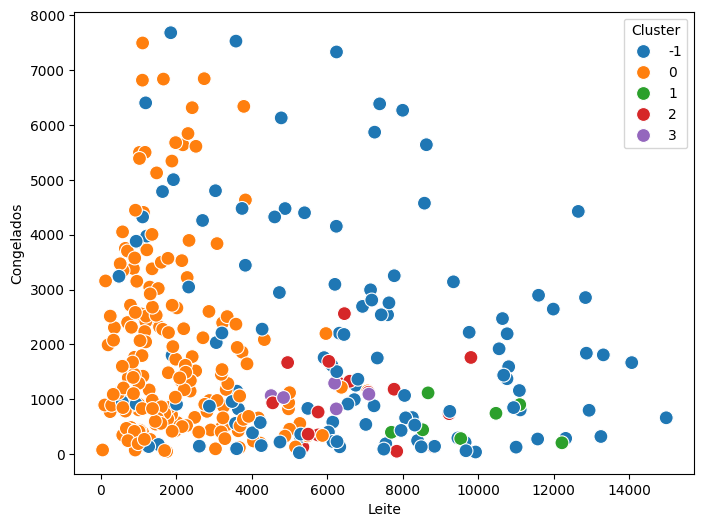

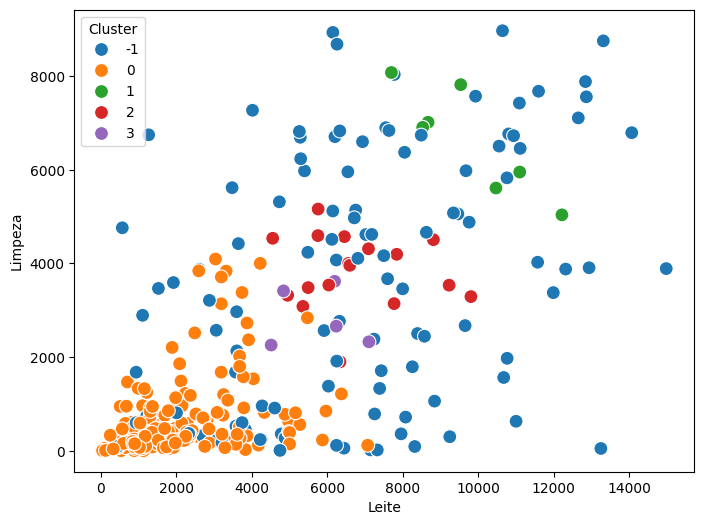

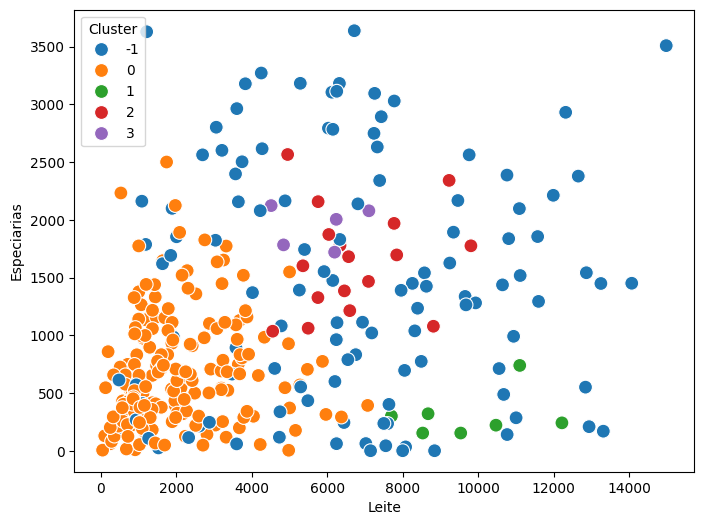

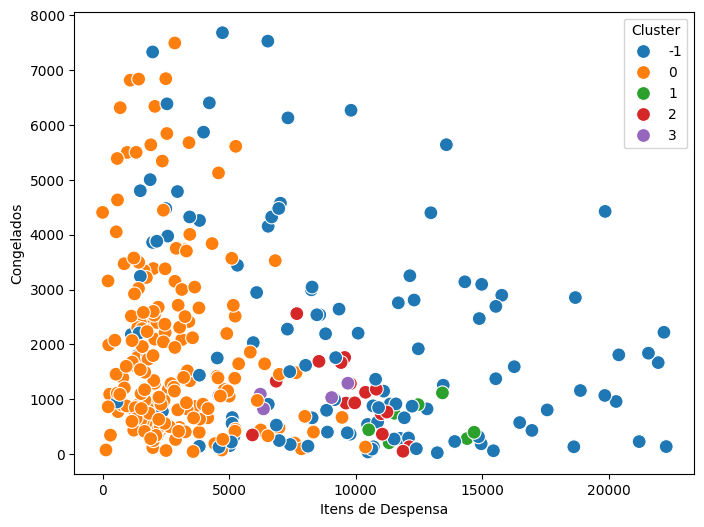

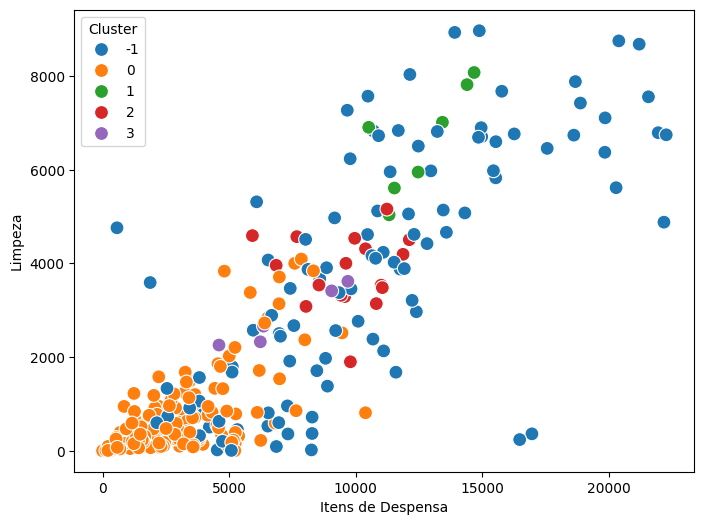

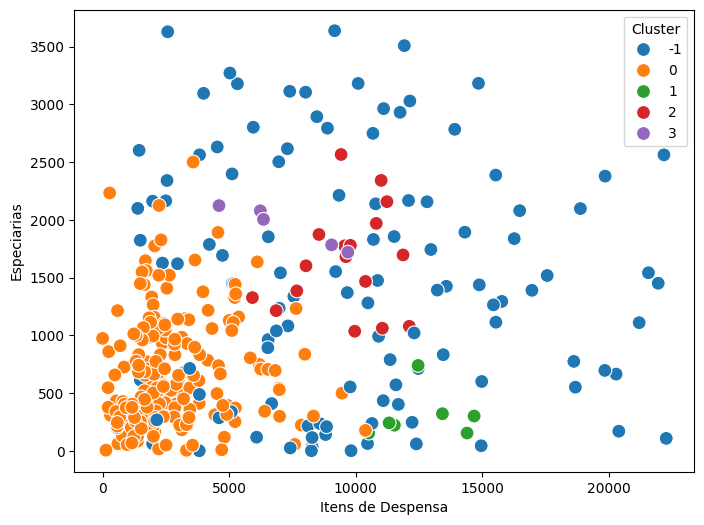

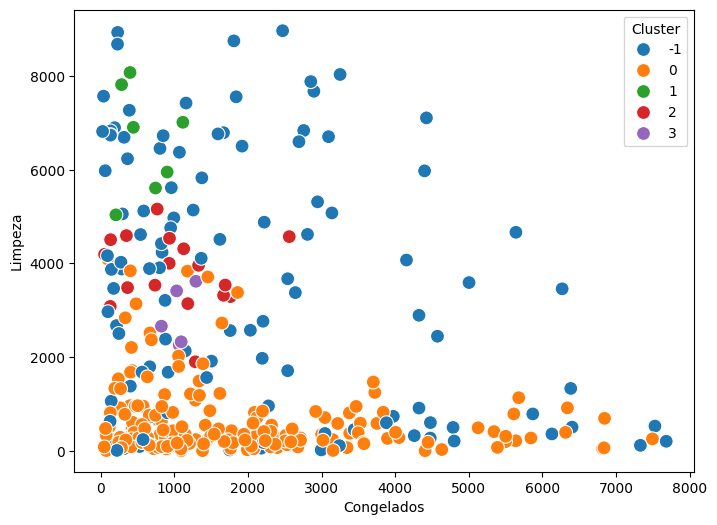

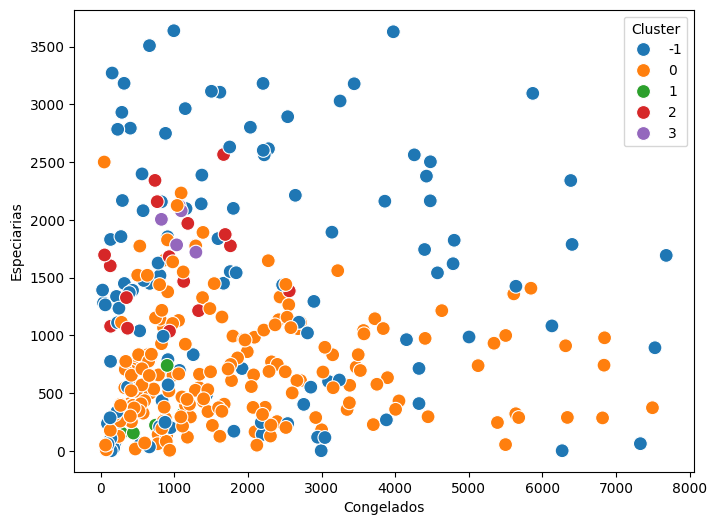

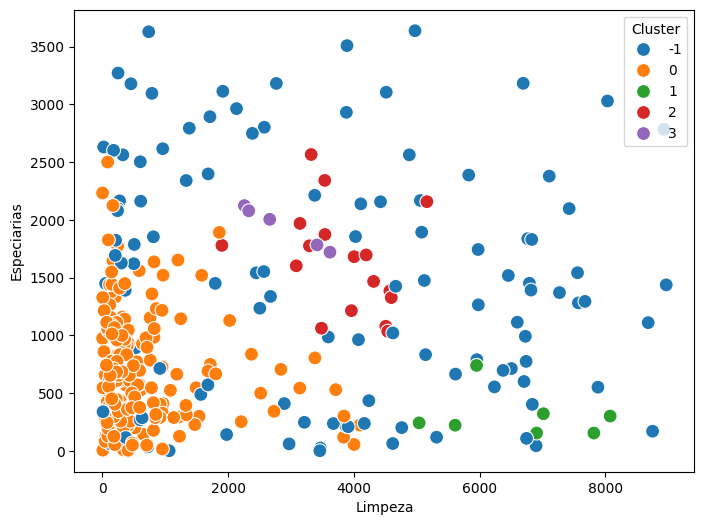

In [11]:
datasetMelhorDBSCAN = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Science/Dataset - Wholesale Customers.csv")

datasetMelhorDBSCAN = datasetMelhorDBSCAN.drop(columns=['Channel', 'Region'])
datasetMelhorDBSCAN.rename(columns={
    'Fresh': 'Produtos Frescos',
    'Milk': 'Leite',
    'Grocery': 'Itens de Despensa',
    'Frozen': 'Congelados',
    'Detergents_Paper': 'Limpeza',
    'Delicassen': 'Especiarias'
}, inplace=True)

#DETECÇÃO E REMOÇÃO DE OUTLIERS
Q1 = datasetMelhorDBSCAN.quantile(0.25)
Q3 = datasetMelhorDBSCAN.quantile(0.75)
IQR = Q3 - Q1

datasetMelhorDBSCAN = datasetMelhorDBSCAN[~((datasetMelhorDBSCAN < (Q1 - 1.5 * IQR)) | (datasetMelhorDBSCAN > (Q3 + 1.5 * IQR))).any(axis=1)]

display(datasetMelhorDBSCAN.head())



#ESCALONAR OS DADOS
scaler = StandardScaler()
XMelhorDBSCAN = scaler.fit_transform(datasetMelhorDBSCAN)

#MODELO
modelMelhorDBSCAN = DBSCAN(eps=1)
YMelhorDBSCAN = modelMelhorDBSCAN.fit_predict(XMelhorDBSCAN)

datasetMelhorDBSCAN['Cluster'] = YMelhorDBSCAN
display(datasetMelhorDBSCAN['Cluster'].value_counts().sort_index())

print(f"\nNúmero de clusters: {len(set(YMelhorDBSCAN)) - (1 if -1 in YMelhorDBSCAN else 0)}")
print(f"Número de ruídos: {list(YMelhorDBSCAN).count(-1)}")
print(f"Silhouette Coefficient: {metrics.silhouette_score(XMelhorDBSCAN, YMelhorDBSCAN):.3f}")



#GERA AS COMBINAÇÕES COM 2 FEATURES
features = datasetMelhorDBSCAN.columns[:-1]
combinations = itertools.combinations(features, 2)

for comb in combinations:
    plt.figure(figsize=(8,6))
    sns.scatterplot(
        x=datasetMelhorDBSCAN[comb[0]],
        y=datasetMelhorDBSCAN[comb[1]],
        hue=datasetMelhorDBSCAN['Cluster'],
        palette='tab10',
        s=100
    )
    plt.xlabel(comb[0])
    plt.ylabel(comb[1])
    plt.legend(title='Cluster')
    plt.show()